In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import pylab

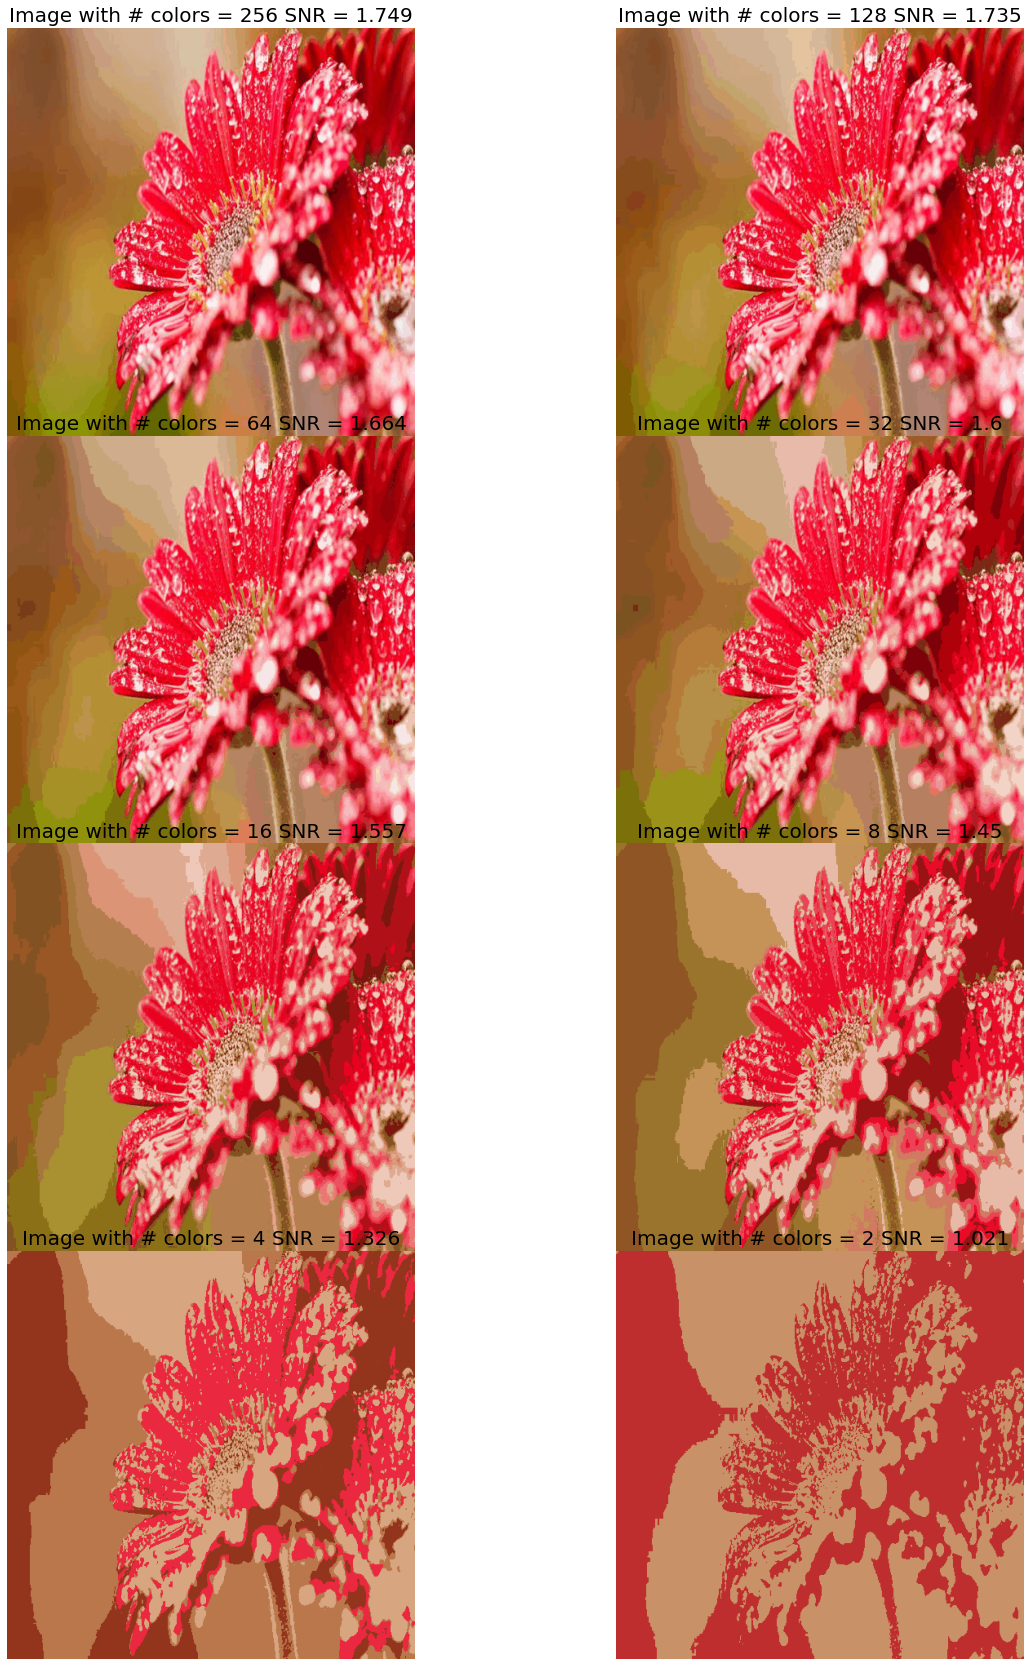

In [2]:
import numpy as np
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

im = Image.open('11.jpg')
pylab.figure(figsize=(20,30))
num_colors_list = [1 << n for n in range(8,0,-1)]
snr_list = []
i = 1
for num_colors in num_colors_list:
 im1 = im.convert('P', palette=Image.ADAPTIVE, colors=num_colors)
 pylab.subplot(4,2,i), pylab.imshow(im1), pylab.axis('off')
 snr_list.append(signaltonoise(im1, axis=None))
 pylab.title('Image with # colors = ' + str(num_colors) + ' SNR = ' +
 str(np.round(snr_list[i-1],3)), size=20)
 i += 1
pylab.subplots_adjust(wspace=0.2, hspace=0)
pylab.show()